# MIDI Fixation For Pitch

## 1. Preparations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from statistics import median
from miditoolkit.midi import parser as mid_parser  
from miditoolkit.midi import containers as ct

from tool_wave import *
from tool_midi import *
from tool_generate import *
from tool_fix import *
print("Done")

Done


In [2]:
midipath = './files/Rule 1.mid'
# midipath = 'C:/Users/J4vix/Desktop/SRP/Long Rule 1.mid'
midiobj = mid_parser.MidiFile(midipath)
df_general = MIDIgeneral(midiobj)
df_instruments = MIDIinstrument(midiobj)
tracks, names = MIDItrack(midiobj)

# use track 0
df = tracks[0]
df.describe()

,start,end,pitch,velocity
count,40.000000,40.000000,40.000000,40.000000
mean,1170.000000,1230.000000,59.600000,76.550000
std,701.427117,701.427117,9.927429,16.763743
min,0.000000,60.000000,36.000000,40.000000
25%,585.000000,645.000000,55.000000,67.750000
50%,1170.000000,1230.000000,60.000000,79.500000
75%,1755.000000,1815.000000,66.000000,85.250000
max,2340.000000,2400.000000,84.000000,120.000000


## 2. Notes And Tonality

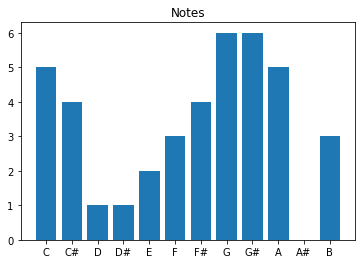

In [3]:
dict_note_count = count_note(df.pitch)
view_notes(dict_note_count)

In [4]:
music_scale = natural_scale(dict_note_count)
print(music_scale)

[7, 9, 11, 0, 2, 4, 6]


## 3. How To Fix ?

FX 1: Delete Outliers

FX 2: Move Towards C5

FX 3: Move Towards The Previous Note

FX 4: Bridge

## Fix 1 : Delete Outliers

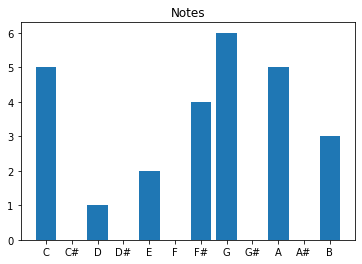

In [5]:
df1 = FX1(df, music_scale)
dict_note_count = count_note(df1.pitch)
view_notes(dict_note_count)

In [6]:
newmidi = mid_parser.MidiFile()
newmidi = generalMIDI(df_general, newmidi)
newmidi = instrumentMIDI(df_instruments, newmidi)
newmidi = trackMIDI([df1], names, newmidi)
parseMIDI(newmidi)
newmidi.dump('./files/FX 1.mid')


 > ticks per beat: 120

 > time signatures: 4 / 4

 > tempo: 128.04097311139566

 > number of tracks: 1
     > number of notes for track AF7 : 26



## Fix 2 : Move Towards C5

or move away from C5, or a specific note.

[7, 9, 11, 0, 2, 4, 6]



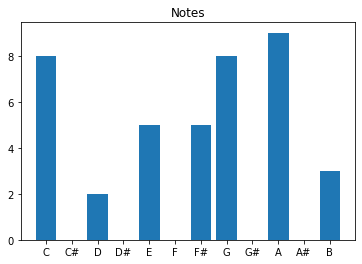

In [7]:
print(music_scale)      # pitch%12 should be in this list

df2 = FX2(df, music_scale)
dict_note_count = count_note(df2.pitch)
view_notes(dict_note_count)

newmidi = mid_parser.MidiFile()
newmidi = generalMIDI(df_general, newmidi)
newmidi = instrumentMIDI(df_instruments, newmidi)
newmidi = trackMIDI([df2], names, newmidi)
newmidi.dump('./files/FX 2.mid')

## Fix 3 : Move Towards The Previous Note

or move away from the previous note, or the following note. 

[7, 9, 11, 0, 2, 4, 6]



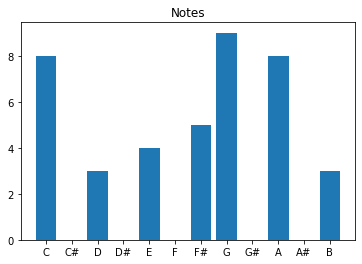

In [8]:
print(music_scale)      # pitch%12 should be in this list

df3 = FX3(df, music_scale)
dict_note_count = count_note(df3.pitch)
view_notes(dict_note_count)

newmidi = mid_parser.MidiFile()
newmidi = generalMIDI(df_general, newmidi)
newmidi = instrumentMIDI(df_instruments, newmidi)
newmidi = trackMIDI([df3], names, newmidi)
newmidi.dump('./files/FX 3.mid')


## Fix 4 : Bridge

**Aims to be smooth and dynamic**

**To achieve the function, first compare with the previous one, then compare with the following one, finally make movement**

The previous and the following ones are both higher, the outlier goes lower [E, D#, E] -> [E, D, E]

The previous and the following ones are both lower, the outlier goes higher [D, D#, D] -> [D, E, D]

The outlier is in the middle, then move closer to the center [C, D#, E] -> [C, D, E]

The outlier is the center, then move away from the previous one [C, D#, F] -> [C, E, F]

[7, 9, 11, 0, 2, 4, 6]



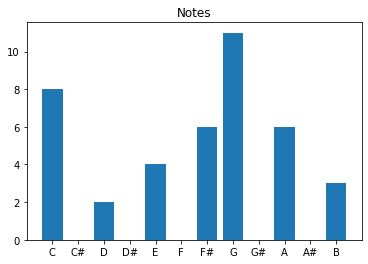

In [9]:
print(music_scale)      # pitch%12 should be in this list

df4 = FX4(df, music_scale)
dict_note_count = count_note(df4.pitch)
view_notes(dict_note_count)

newmidi = mid_parser.MidiFile()
newmidi = generalMIDI(df_general, newmidi)
newmidi = instrumentMIDI(df_instruments, newmidi)
newmidi = trackMIDI([df4], names, newmidi)
newmidi.dump('./files/FX 4.mid')

## 5. Further Plan

After we can decide chord in each section, we have 2 possible note sets to move outliers to.

set1 = {chord notes}

set2 = {pentatonic notes}